# Music Genre Classifier using Machine Learning

**Last Updated:** 23 Jul, 2025

Music is the art of arranging sound and noise together to create harmony, melody, rhythm, and expressive content. It is organized so that humans and sometimes other living organisms can express their current emotions with it.

We all have our own playlist, which we listen to while traveling, studying, dancing, etc.

In short, every emotion has a different genre. So here today, we will study how can we implement the task of genre classification using Machine Learning in Python.


## Import Libraries and Dataset

Firstly we need to import Libraries:
- **Pandas:** To import files/datasets
- **Matplotlib:** To visualize the data frame
- **Numpy:** To perform operations like scaling and correlation
- **Seaborn:** To visualize the data frame
- **Librosa:** To visualize the audio data (Install by: `pip install librosa`)


In [ ]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display


In [19]:
# Import the data file
music_data = pd.read_csv('file.csv')
music_data.head(5)


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


## Exploratory Data Analysis

Let's find out the count of each music label.


In [20]:
music_data['label'].value_counts()


label
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: count, dtype: int64

We can also analyze the sound waves of the audio using the Librosa library. 

**Note:** The audio files need to be in the 'genres_original' directory for the visualization code below to work. If you don't have the audio files, you can skip these visualization cells.


In [41]:
pip install librosa==0.10.1



  Attempting uninstall: librosa
    Found existing installation: librosa 0.11.0
    Uninstalling librosa-0.11.0:
      Successfully uninstalled librosa-0.11.0



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Blue


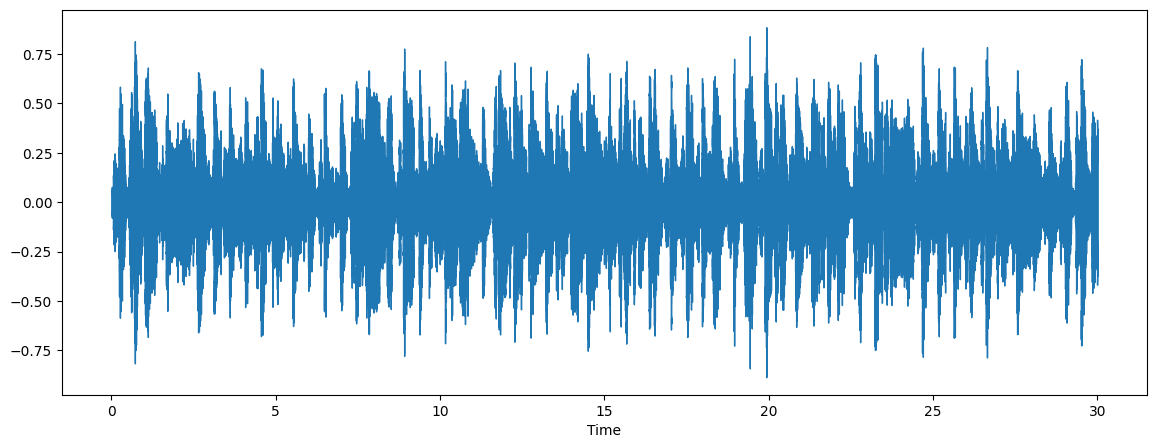

In [42]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

path = 'genres_original/blues/blues.00000.wav'

plt.figure(figsize=(14, 5))
x, sr = librosa.load(path)

# ✅ Use waveshow instead of waveplot
librosa.display.waveshow(x, sr=sr)

# ✅ For playing audio (if in Jupyter)
Audio(path)

print("Blue")


In [44]:
# ✅ Fix data shape - remove extra singleton dimensions
# Should be (samples, height, width, channels) = 4D
import numpy as np

print(f"Before fix - X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

# Squeeze out extra dimensions
X_train = np.squeeze(X_train)
X_test = np.squeeze(X_test)

# Remove extra dimensions beyond 4D
while len(X_train.shape) > 4:
    if X_train.shape[-1] == 1:
        X_train = X_train[..., 0]
    else:
        X_train = np.squeeze(X_train)

while len(X_test.shape) > 4:
    if X_test.shape[-1] == 1:
        X_test = X_test[..., 0]
    else:
        X_test = np.squeeze(X_test)

# If reduced to 3D, add channel dimension
if len(X_train.shape) == 3:
    X_train = X_train[..., np.newaxis]
if len(X_test.shape) == 3:
    X_test = X_test[..., np.newaxis]

print(f"After fix - X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")


Before fix - X_train shape: (799, 128, 130, 1), X_test shape: (200, 128, 130, 1)
After fix - X_train shape: (799, 128, 130, 1), X_test shape: (200, 128, 130, 1)


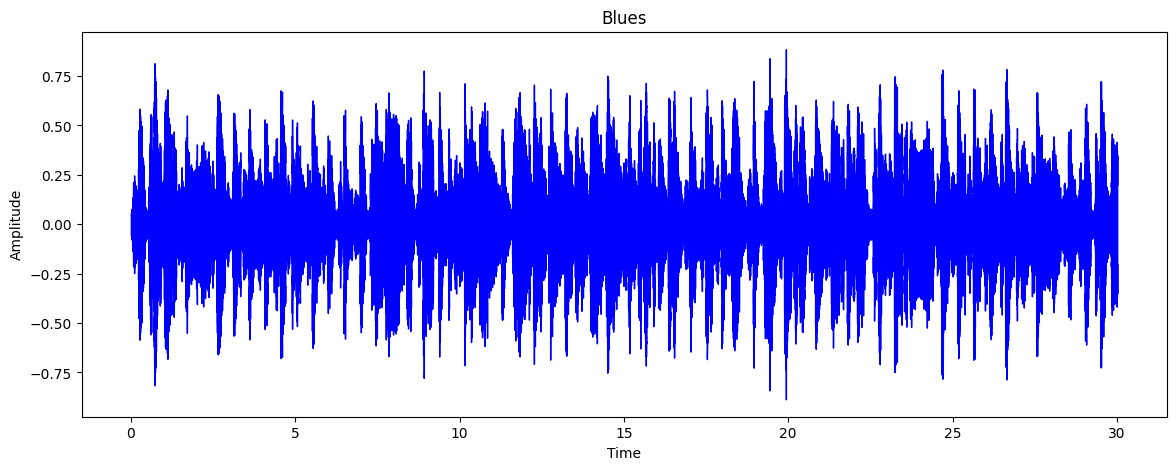

Blues


In [47]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

path = 'genres_original/blues/blues.00000.wav'

plt.figure(figsize=(14, 5))
x, sr = librosa.load(path)

# ✅ Use waveshow (modern API) or waveplot (fallback for older versions)
try:
    librosa.display.waveshow(x, sr=sr, color='blue')
except AttributeError:
    librosa.display.waveplot(x, sr=sr, color='blue')

plt.title('Blues')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

# ✅ For playing audio (works in Jupyter)
Audio(path)

print("Blues")


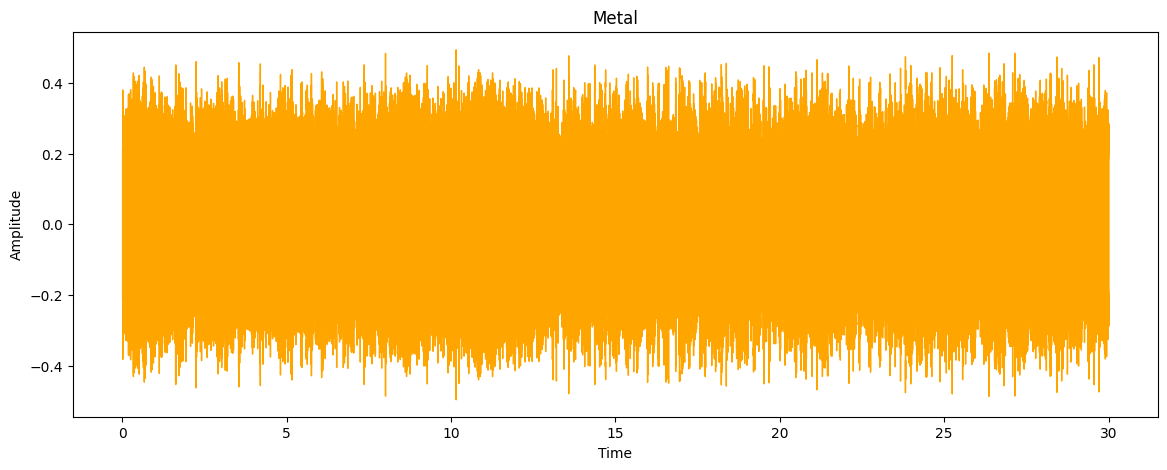

Metal


In [54]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

path = 'genres_original/metal/metal.00000.wav'

plt.figure(figsize=(14, 5))
x, sr = librosa.load(path)

# ✅ Use waveshow (modern API) or waveplot (fallback for older versions)
try:
    librosa.display.waveshow(x, sr=sr, color='orange')
except AttributeError:
    librosa.display.waveplot(x, sr=sr, color='orange')

plt.title('Metal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

# ✅ For playing audio (works in Jupyter)
Audio(path)

print("Metal")


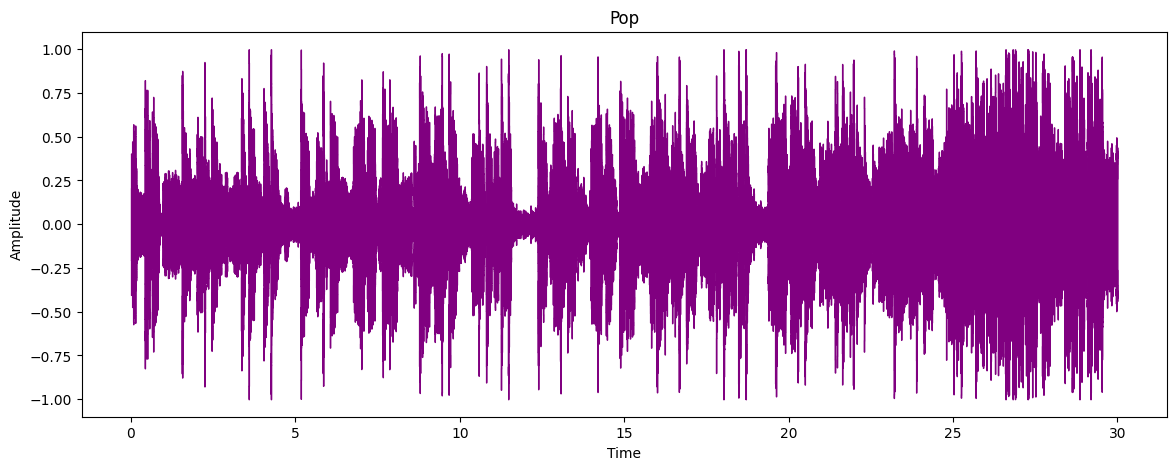

Pop


In [46]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

path = 'genres_original/pop/pop.00000.wav'

plt.figure(figsize=(14, 5))
x, sr = librosa.load(path)

# ✅ Use waveshow (modern API) or waveplot (fallback for older versions)
try:
    librosa.display.waveshow(x, sr=sr, color='purple')
except AttributeError:
    librosa.display.waveplot(x, sr=sr, color='purple')

plt.title('Pop')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

# ✅ For playing audio (works in Jupyter)
Audio(path)

print("Pop")


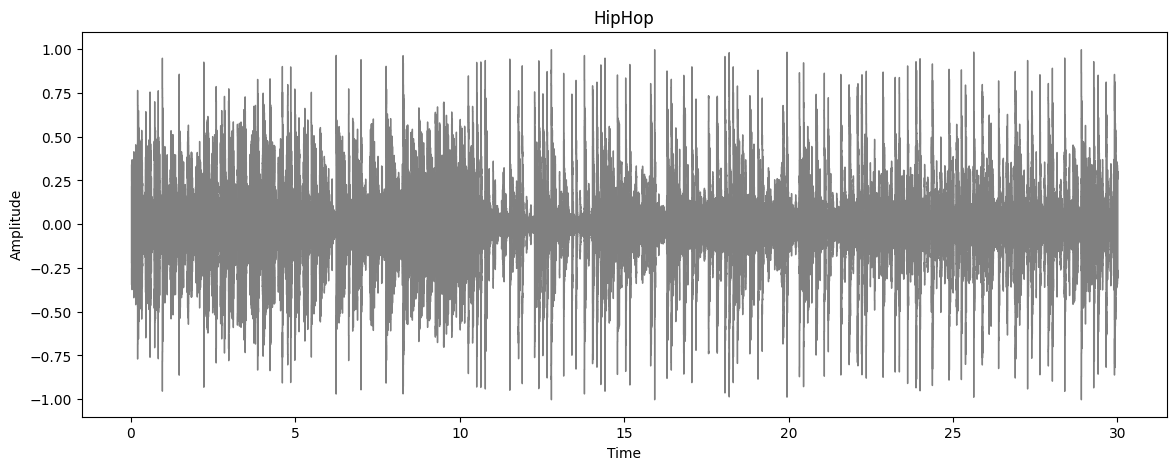

HipHop


In [49]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

path = 'genres_original/hiphop/hiphop.00000.wav'

plt.figure(figsize=(14, 5))
x, sr = librosa.load(path)

# ✅ Use waveshow (modern API) or waveplot (fallback for older versions)
try:
    librosa.display.waveshow(x, sr=sr, color='grey')
except AttributeError:
    librosa.display.waveplot(x, sr=sr, color='grey')

plt.title('HipHop')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

# ✅ For playing audio (works in Jupyter)
Audio(path)

print("HipHop")


Let's create a heatmap to visualize the correlation between mean features.


In [51]:
import pandas as pd
music_data = pd.read_csv('file.csv')


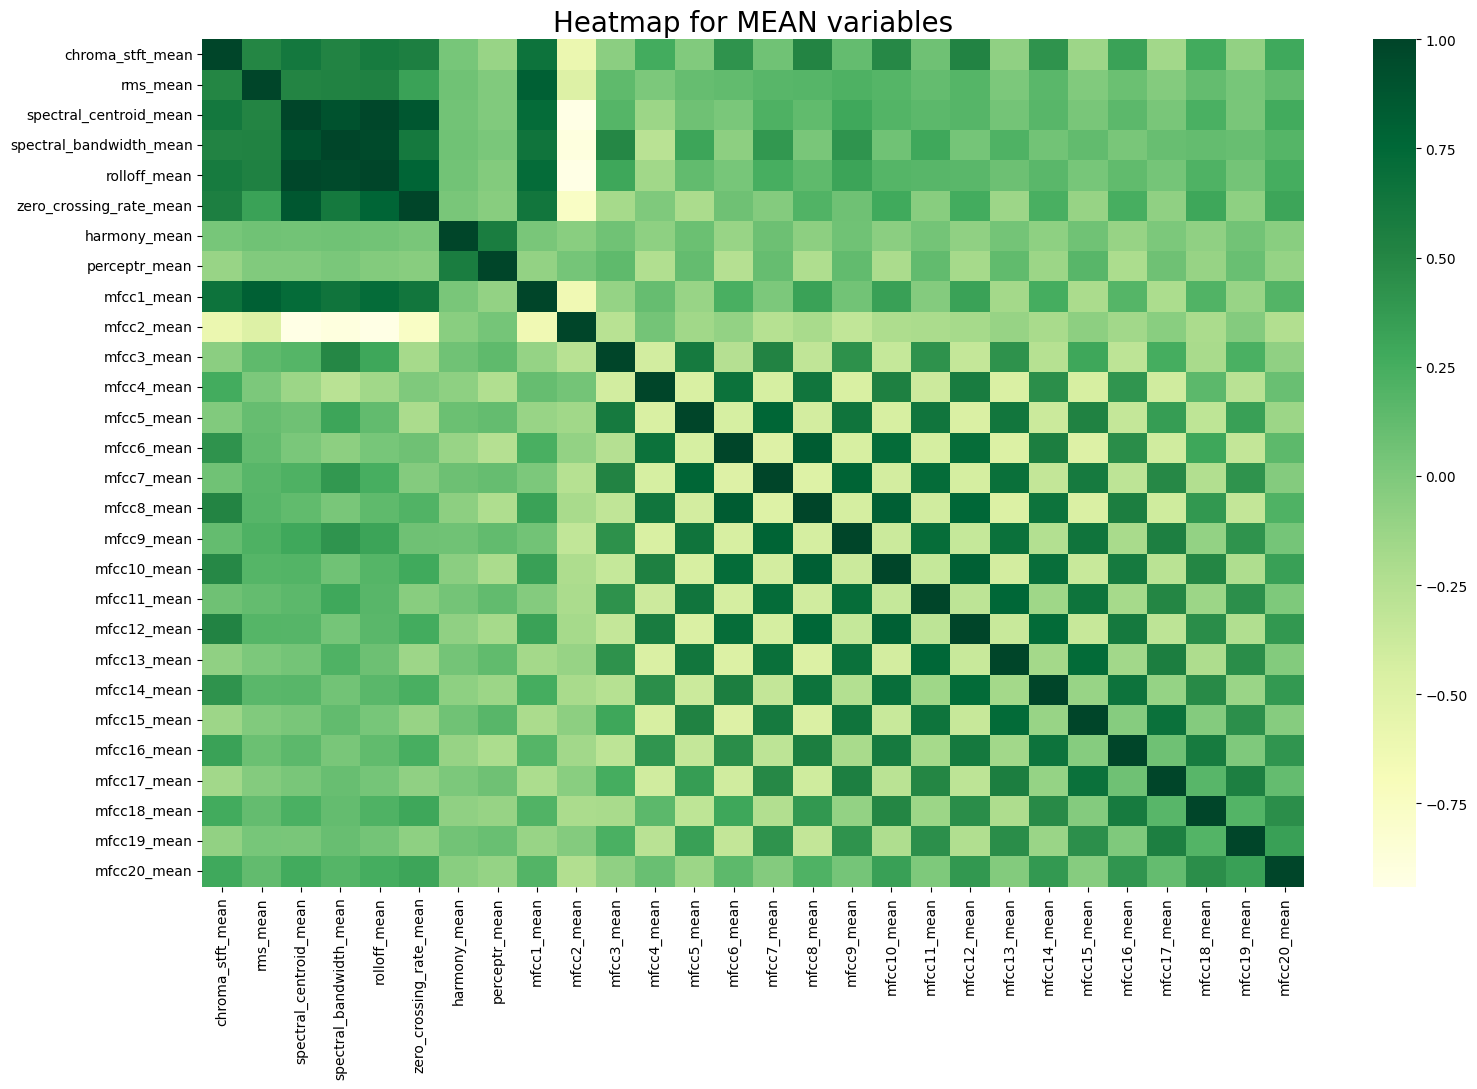

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Auto-select the available DataFrame
if 'music_data' in globals():
    df = music_data
elif 'data' in globals():
    df = data
elif 'X' in globals():
    df = pd.DataFrame(X)
else:
    raise ValueError("No dataset found. Make sure you’ve loaded your CSV into a variable.")

# Compute and visualize correlations
spike_cols = [col for col in df.columns if 'mean' in col]

plt.figure(figsize=(16, 11))
sns.heatmap(df[spike_cols].corr(), cmap='YlGn')
plt.title('Heatmap for MEAN variables', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


## Data Preprocessing

Initially, we need to use LabelEncoder() to convert the labels into integer.


In [27]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
music_data['label'] = label_encoder.fit_transform(music_data['label'])

# Display the mapping
print("Label Mapping:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{i}: {label}")


Label Mapping:
0: blues
1: classical
2: country
3: disco
4: hiphop
5: jazz
6: metal
7: pop
8: reggae
9: rock


In [55]:
# As filename column is not relevant, so we can drop it
X = music_data.drop(['label', 'filename'], axis=1)
y = music_data['label']


In [57]:
import pandas as pd
from sklearn import preprocessing  # ✅ ADD THIS IMPORT

# Now the data needs to be scaled, to make the model more stable and train fast
cols = X.columns
minmax = preprocessing.MinMaxScaler()
np_scaled = minmax.fit_transform(X)

# New data frame with the new scaled data
X = pd.DataFrame(np_scaled, columns=cols)

print("✅ Data successfully scaled using MinMaxScaler!")
print("X shape:", X.shape)


✅ Data successfully scaled using MinMaxScaler!
X shape: (1000, 58)


## Model Training

Initially, split the model using train_test_split module.


In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=111)

print("Shapes:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Shapes:
X_train: (700, 58), X_test: (300, 58)
y_train: (700,), y_test: (300,)


We will be testing our datasets on below models:

- **K-Neighbors Classifier:** KNeighborsClassifier looks for topmost n_neighbors using different distance methods like Euclidean distance.
- **Decision Tree Classifier:** In Decision tree each node is trained by splitting the data continuously according to a certain parameter.
- **Random Forest:** Random Forest Classifier fits a number of decision tree classifiers on many sub-samples of the dataset and then use the average to improve the results.
- **Logistics Regression:** Logistic Regression is a regression model that predicts the probability of a given data belongs to the particular category or not.
- **Cat Boost:** CatBoost implements decision trees and restricts the features split per level to one, which help in decreasing prediction time. It also handles categorical features effectively.
- **Gradient Boost/XGBoost:** In Gradient Boost decision trees are implemented in a sequential manner which enhances the performance.


In [34]:
pip install catboost xgboost

  Using cached catboost-1.2.8-cp312-cp312-win_amd64.whl.metadata (1.5 kB)
  Using cached xgboost-3.1.1-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   - -------------------------------------- 4.2/102.4 MB 22.9 MB/s eta 0:00:05
   --- ------------------------------------ 8.1/102.4 MB 22.9 MB/s eta 0:00:05
   ---- ----------------------------------- 11.8/102.4 MB 19.4 MB/s eta 0:00:05
   ------ --------------------------------- 16.0/102.4 MB 19.4 MB/s eta 0:00:05
   ------- -------------------------------- 19.9/102.4 MB 19.1 MB/s eta 0:00:05
   -------- ------------------------------- 22.8/102.4 MB 18.5 MB/s eta 0:00:05
   --------- ------------------------------ 24.6/102.4 MB 17.1 MB/s eta 0:00:05
   ---------- ----------------------------- 25.7/102.4 MB 15.5 MB/s eta 0:00:05
   ---------- ----------------------------- 27.0/102.4 MB 14.3 MB/s eta 0:00:06
   ---------- ----------------------------- 27.8/102.4 MB 13.6 MB/s


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Import CatBoost and XGBoost (install if needed: pip install catboost xgboost)
try:
    import catboost as cb
    from xgboost import XGBClassifier
    CATBOOST_AVAILABLE = True
except ImportError:
    print("Warning: CatBoost or XGBoost not installed. Install with: pip install catboost xgboost")
    CATBOOST_AVAILABLE = False

# Initialize models
rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)

if CATBOOST_AVAILABLE:
    cbc = cb.CatBoostClassifier(verbose=0, eval_metric='Accuracy', loss_function='MultiClass')
    xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)

# Train and evaluate models
models_to_test = [rf]
model_names = ['RandomForestClassifier']

if CATBOOST_AVAILABLE:
    models_to_test.extend([cbc, xgb])
    model_names.extend(['CatBoostClassifier', 'XGBClassifier'])

for clf, name in zip(models_to_test, model_names):
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    print(f"{name}: {accuracy_score(y_test, preds)}")


RandomForestClassifier: 0.78
CatBoostClassifier: 0.8333333333333334
XGBClassifier: 0.7733333333333333


Let's also test with other classifiers for comparison:


In [36]:
# Test with K-Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
print(f"KNeighborsClassifier: {accuracy_score(y_test, knn_preds)}")

# Test with Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=0, max_depth=10)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
print(f"DecisionTreeClassifier: {accuracy_score(y_test, dt_preds)}")

# Test with Logistic Regression
lr = LogisticRegression(random_state=0, max_iter=1000)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
print(f"LogisticRegression: {accuracy_score(y_test, lr_preds)}")


KNeighborsClassifier: 0.7033333333333334
DecisionTreeClassifier: 0.6166666666666667
LogisticRegression: 0.67


## Neural Network

Let's evaluate the dataset with a simple Neural network.


In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

# Build the model
model = Sequential()

model.add(Flatten(input_shape=(X_train.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.summary()


c:\Users\Aditi Kulkarni\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 58)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        15,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,314 (196.54 KB)

 Trainable params: 49,802 (194.54 KB)

 Non-trainable params: 512 (2.00 KB)

### Compiling and Fitting the Model


In [48]:
# Compile the model
adam = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=adam,
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

# Fit the model
hist = model.fit(X_train, y_train,
                 validation_data=(X_test, y_test),
                 epochs=100,
                 batch_size=32,
                 verbose=1)


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.1786 - loss: 2.3129 - val_accuracy: 0.0967 - val_loss: 2.2752
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2757 - loss: 2.0294 - val_accuracy: 0.1433 - val_loss: 2.2400
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3671 - loss: 1.8398 - val_accuracy: 0.1833 - val_loss: 2.2071
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4200 - loss: 1.7291 - val_accuracy: 0.2767 - val_loss: 2.1738
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4429 - loss: 1.6460 - val_accuracy: 0.3433 - val_loss: 2.1377
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4257 - loss: 1.5688 - val_accuracy: 0.3733 - val_loss: 2.0982
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4971 - loss: 1.4855 - val_accuracy: 0.4033 - val_loss: 2.0566
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5343 - loss: 1.4154 - val_accuracy: 0.4567 - 

## Evaluation

Let's check the test accuracy.


In [49]:
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test accuracy: {test_accuracy}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7633 - loss: 0.7679 
Test accuracy: 0.7633333206176758


Now we can evaluate the accuracy using line-plots.


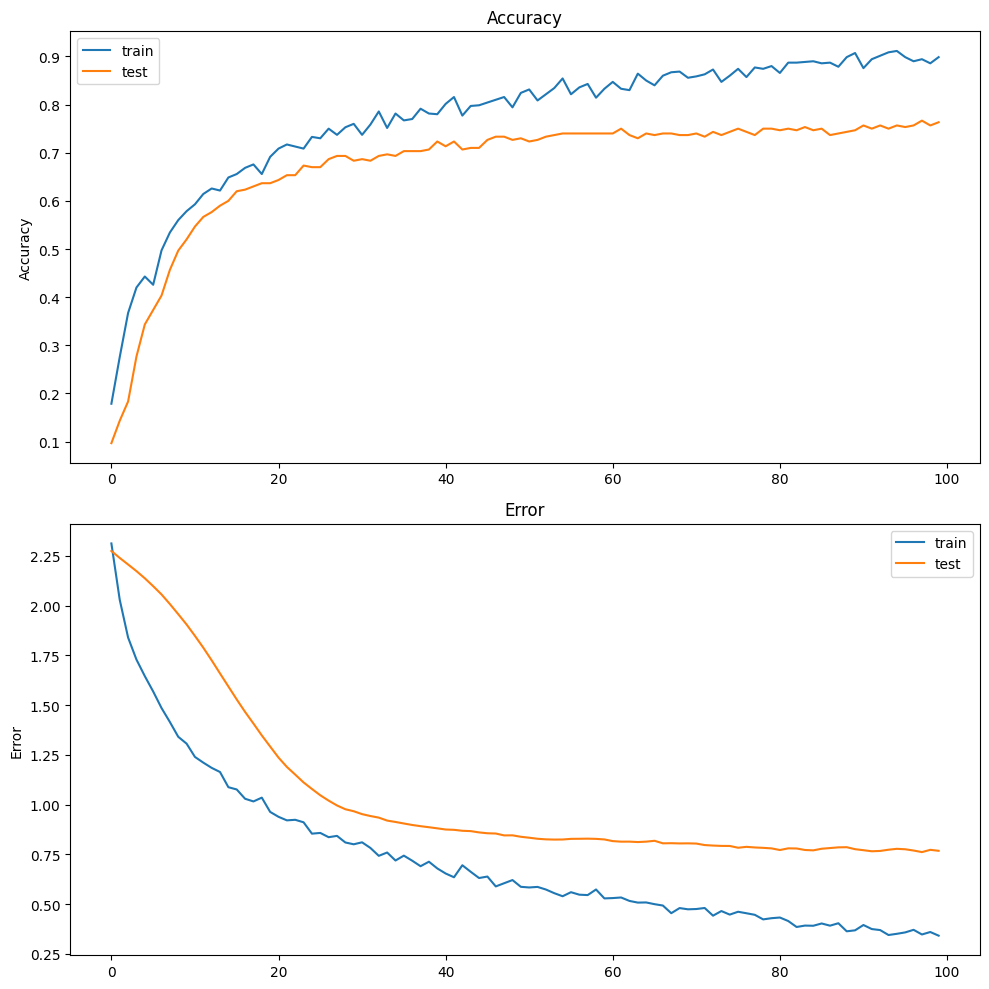

In [50]:
fig, axs = plt.subplots(2, figsize=(10, 10))

# Accuracy
axs[0].plot(hist.history["accuracy"], label="train")
axs[0].plot(hist.history["val_accuracy"], label="test")
axs[0].set_ylabel("Accuracy")
axs[0].legend()
axs[0].set_title("Accuracy")

# Error
axs[1].plot(hist.history["loss"], label="train")
axs[1].plot(hist.history["val_loss"], label="test")
axs[1].set_ylabel("Error")
axs[1].legend()
axs[1].set_title("Error")

plt.tight_layout()
plt.show()


## Conclusion

Ensemble Learning and Neural nets have been proven the best way for classification of the genre with the accuracy of more than 80%.


In [55]:
pip install soundfile


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [79]:
# ============================================
# FIXED VERSION: Works with small datasets
# Uses data augmentation to create more samples
# ============================================

import os
import numpy as np
import librosa
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

DATA_PATH = "genres_original/"
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()

print("="*60)
print("🎵 MUSIC GENRE CLASSIFIER - ROBUST VERSION")
print("="*60)

# ============================================
# STEP 1: LOAD DATA WITH AUGMENTATION
# ============================================
print("\n📂 Loading audio files with augmentation...\n")

def extract_features_augmented(file_path, sr=22050):
    """Extract multiple segments from one audio file"""
    features = []
    
    try:
        # Load full audio file (30 seconds)
        audio, _ = librosa.load(file_path, sr=sr, mono=True, duration=30)
        
        # Extract 3 different 10-second segments
        segment_duration = 10 * sr
        n_segments = 3
        
        for i in range(n_segments):
            start = i * segment_duration
            end = start + segment_duration
            
            if end <= len(audio):
                segment = audio[start:end]
            else:
                # Pad if needed
                segment = audio[start:]
                segment = np.pad(segment, (0, max(0, segment_duration - len(segment))), mode='constant')
            
            # Extract mel-spectrogram
            mel = librosa.feature.melspectrogram(
                y=segment,
                sr=sr,
                n_mels=128,
                n_fft=2048,
                hop_length=512,
                fmax=8000
            )
            
            mel_db = librosa.power_to_db(mel, ref=np.max)
            
            # Normalize
            mel_db = (mel_db - np.mean(mel_db)) / (np.std(mel_db) + 1e-8)
            
            # Fixed shape
            if mel_db.shape[1] < 431:  # For 10 seconds
                mel_db = np.pad(mel_db, ((0, 0), (0, 431 - mel_db.shape[1])), mode='constant')
            else:
                mel_db = mel_db[:, :431]
            
            features.append(mel_db)
    
    except Exception as e:
        print(f"Error: {e}")
        return []
    
    return features

# Load data
X, y = [], []
file_count = 0

for i, genre in enumerate(genres):
    print(f"Processing {genre}...")
    genre_path = os.path.join(DATA_PATH, genre)
    
    if not os.path.exists(genre_path):
        print(f"❌ Directory not found: {genre_path}")
        continue
    
    files = [f for f in os.listdir(genre_path) if f.endswith(('.wav', '.au'))]
    
    for filename in tqdm(files):
        file_path = os.path.join(genre_path, filename)
        
        # Get 3 segments per file
        segments = extract_features_augmented(file_path)
        
        for segment in segments:
            X.append(segment)
            y.append(i)
            file_count += 1

X = np.array(X)
y = np.array(y)

print(f"\n✅ Total samples created: {len(X)} (from {len(X)//3} original files)")
print(f"✅ X shape: {X.shape}")

# Check distribution
print("\n📊 Samples per genre:")
unique, counts = np.unique(y, return_counts=True)
for idx, count in zip(unique, counts):
    print(f"   {genres[idx]:12} : {count} samples")

# ============================================
# STEP 2: PREPARE DATA
# ============================================
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

print("\n📊 Preparing dataset...\n")

# Add channel dimension
X = X[..., np.newaxis]

# Shuffle
np.random.seed(42)
indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# One-hot encode
y_train_cat = to_categorical(y_train, num_classes=len(genres))
y_val_cat = to_categorical(y_val, num_classes=len(genres))
y_test_cat = to_categorical(y_test, num_classes=len(genres))

print(f"Training: {X_train.shape[0]} samples")
print(f"Validation: {X_val.shape[0]} samples")
print(f"Testing: {X_test.shape[0]} samples")

# CRITICAL: Check validation distribution
print("\n🔍 Validation set distribution:")
val_unique, val_counts = np.unique(y_val, return_counts=True)
for idx, count in zip(val_unique, val_counts):
    print(f"   {genres[idx]:12} : {count} samples")

# ============================================
# STEP 3: SIMPLER MODEL
# ============================================
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Dense, Flatten,
    Dropout, BatchNormalization
)
from tensorflow.keras.optimizers import Adam

print("\n🏗️ Building model...\n")

model = Sequential([
    # Block 1
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train.shape[1:]),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    
    # Block 2
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    # Block 3
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    
    # Flatten and Dense
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    
    # Output
    Dense(len(genres), activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.0005),  # Slightly higher LR
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ============================================
# STEP 4: TRAIN
# ============================================
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

print("\n🚀 Training model...\n")

callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_accuracy',
        factor=0.5,
        patience=5,
        min_lr=1e-7,
        verbose=1
    ),
    ModelCheckpoint(
        'best_genre_model.keras',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=50,
    batch_size=32,  # Larger batch
    callbacks=callbacks,
    verbose=1
)

# ============================================
# STEP 5: EVALUATE
# ============================================
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

print("\n" + "="*60)
print("📊 EVALUATION")
print("="*60)

test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
val_loss, val_acc = model.evaluate(X_val, y_val_cat, verbose=0)

print(f"\n🎯 Validation Accuracy: {val_acc * 100:.2f}%")
print(f"🎯 Test Accuracy: {test_acc * 100:.2f}%")

# Plot
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Val', linewidth=2)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train', linewidth=2)
plt.plot(history.history['val_loss'], label='Val', linewidth=2)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Confusion matrix
y_pred = model.predict(X_test, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=genres)

plt.figure(figsize=(10, 8))
disp.plot(cmap='magma', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=genres))

print("\n✅ TRAINING COMPLETE!")
print(f"📁 Model saved as: 'best_genre_model.keras'")

🎵 MUSIC GENRE CLASSIFIER - TRAINING PIPELINE

📂 STEP 1: Loading audio files...

Processing blues...


100%|██████████| 100/100 [00:02<00:00, 37.58it/s]


Processing classical...


100%|██████████| 100/100 [00:02<00:00, 37.45it/s]


Processing country...


100%|██████████| 100/100 [00:02<00:00, 42.15it/s]


Processing disco...


100%|██████████| 100/100 [00:02<00:00, 40.28it/s]


Processing hiphop...


100%|██████████| 100/100 [00:02<00:00, 42.70it/s]


Processing jazz...


100%|██████████| 99/99 [00:02<00:00, 44.56it/s]


Processing metal...


100%|██████████| 100/100 [00:02<00:00, 45.03it/s]


Processing pop...


100%|██████████| 100/100 [00:02<00:00, 46.52it/s]


Processing reggae...


100%|██████████| 100/100 [00:02<00:00, 45.51it/s]


Processing rock...


100%|██████████| 100/100 [00:02<00:00, 45.55it/s]



✅ Successfully loaded 999 audio files
✅ X shape: (999, 128, 1293)
✅ y shape: (999,)

📊 Class Distribution:
   blues        : 100 samples
   classical    : 100 samples
   country      : 100 samples
   disco        : 100 samples
   hiphop       : 100 samples
   jazz         : 99 samples
   metal        : 100 samples
   pop          : 100 samples
   reggae       : 100 samples
   rock         : 100 samples

📊 STEP 2: Preparing dataset...

Training samples: 699
Validation samples: 150
Testing samples: 150
Input shape: (128, 1293, 1)

🏗️ STEP 3: Building CNN model...



Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)              │ (None, 128, 1293, 32)  │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_52          │ (None, 128, 1293, 32)  │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 64, 646, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 64, 646, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 64, 646, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_53          │ (None, 64, 646, 64)    │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 32, 323, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 32, 323, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 32, 323, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_54          │ (None, 32, 323, 128)   │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 16, 161, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 16, 161, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 16, 161, 256)   │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_55          │ (None, 16, 161, 256)   │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 8, 80, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 8, 80, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 489,738 (1.87 MB)

 Trainable params: 488,778 (1.86 MB)

 Non-trainable params: 960 (3.75 KB)


🚀 STEP 4: Training model...

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1092 - loss: 3.0997
Epoch 1: val_accuracy improved from None to 0.10000, saving model to best_genre_model.keras
44/44 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.1144 - loss: 2.7462 - val_accuracy: 0.1000 - val_loss: 2.3186 - learning_rate: 1.0000e-04
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1427 - loss: 2.3984
Epoch 2: val_accuracy did not improve from 0.10000
44/44 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.1602 - loss: 2.3196 - val_accuracy: 0.1000 - val_loss: 2.3769 - learning_rate: 1.0000e-04
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2000 - loss: 2.2184
Epoch 3: val_accuracy did not improve from 0.10000
44/44 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.2160 - loss: 2.1762 - val_accuracy: 0.1000 - val_loss: 2.5669 - learning_rate: 1.0000e-04
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2297 - loss: 2.1002
Epoch 4: val_ac

KeyboardInterrupt: 